## Exploratory Data Analysis

In [34]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [35]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [36]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [37]:
iris.data.shape

(150, 4)

In [38]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [50]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

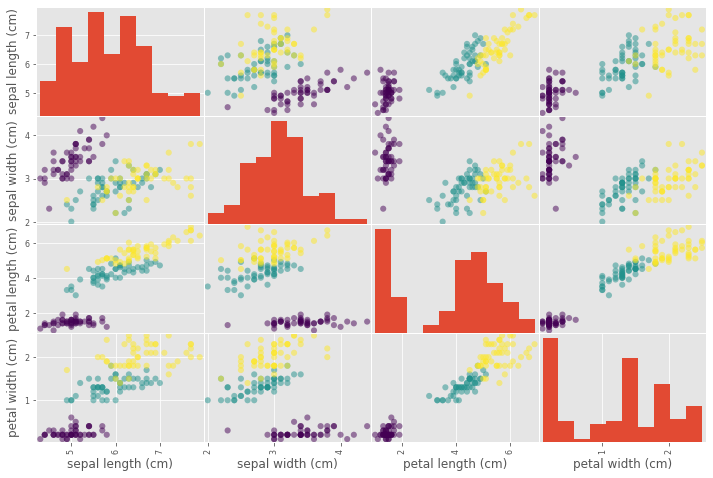

In [51]:
# df is dataframe, c is color by target label
# s should be the height in inches,
# marker here is shape of data points D is diamond, '.' is dot
pd.plotting.scatter_matrix(df,c=Y,figsize = [12,8],s=150, marker='.')

### K Nearest Neighbor



In [49]:
np.unique(iris['target'])

array([0, 1, 2])

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(n_neighbors=6)

In [53]:
## Predicting an unlabeled data

X_new = np.array([[5.6, 2.8, 3.9, 1.1],
[5.7, 2.6, 3.8, 1.3],
[4.7, 3.2, 1.3, 0.2]])

prediction = knn.predict(X_new)
X_new.shape

(3, 4)

In [54]:
print('Prediction: {}'.format(prediction))

Prediction: [1 1 0]


## Train/test split

stratify helps in equal distribution between train and test label.

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [58]:
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


score is the mean accuracy on a given test data and label

In [59]:
knn.score(X_test,y_test)

0.9555555555555556

In [60]:
knn.score(X_train,y_train)

0.9809523809523809

Larger k = smoother decision boundary = less complex model
Smaller k = more complex model = can lead to overfitting
if you increase the k more(Larger k), thus less complex, leads to underfitting

## Numerical EDA

In this chapter, you'll be working with a dataset obtained from the UCI Machine Learning Repository consisting of votes made by US House of Representatives Congressmen. Your goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues. Here, it's worth noting that we have preprocessed this dataset to deal with missing values. This is so that your focus can be directed towards understanding how to train and evaluate supervised learning models. Once you have mastered these fundamentals, you will be introduced to preprocessing techniques in Chapter 4 and have the chance to apply them there yourself - including on this very same dataset!

Before thinking about what supervised learning models you can apply to this, however, you need to perform Exploratory data analysis (EDA) in order to understand the structure of the data. For a refresher on the importance of EDA, check out the first two chapters of Statistical Thinking in Python (Part 1).

Get started with your EDA now by exploring this voting records dataset numerically. It has been pre-loaded for you into a DataFrame called df. Use pandas' .head(), .info(), and .describe() methods in the IPython Shell to explore the DataFrame, and select the statement below that is not true.

In [26]:
header=['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']

df=pd.read_csv("house-votes-84.csv",names=header)
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [27]:
df.shape

(435, 17)

In [28]:
df.dtypes

party                object
infants              object
water                object
budget               object
physician            object
salvador             object
religious            object
satellite            object
aid                  object
missile              object
immigration          object
synfuels             object
education            object
superfund            object
crime                object
duty_free_exports    object
eaa_rsa              object
dtype: object

In [33]:
df.nunique()

party                2
infants              3
water                3
budget               3
physician            3
salvador             3
religious            3
satellite            3
aid                  3
missile              3
immigration          3
synfuels             3
education            3
superfund            3
crime                3
duty_free_exports    3
eaa_rsa              3
dtype: int64

## The digits recognition dataset

Up until now, you have been performing binary classification, since the target variable had two possible outcomes. Hugo, however, got to perform multi-class classification in the videos, where the target variable could take on three possible outcomes. Why does he get to have all the fun?! In the following exercises, you'll be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images, as you'll see in this exercise (for more on plotting 2D arrays, see Chapter 2 of DataCamp's course on Data Visualization with Python). On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

Notice that you can access the keys of these Bunch objects in two different ways: By using the . notation, as in digits.images, or the [] notation, as in digits['images'].

For more on the MNIST data, check out this exercise in Part 1 of DataCamp's Importing Data in Python course. There, the full version of the MNIST dataset is used, in which the images are 28x28. It is a famous dataset in machine learning and computer vision, and frequently used as a benchmark to evaluate the performance of a new model.

In [61]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

In [62]:
# Load the digits dataset: digits
digits = datasets.load_digits()

In [66]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [72]:
# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

In [70]:
# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


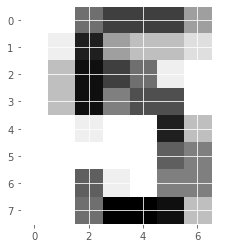

In [71]:
# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

Train/Test Split + Fit/Predict/Accuracy
Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset! After creating arrays for the features and target variable, you will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the .score() method.

In [74]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


0.9833333333333333


### Overfitting and underfitting
Remember the model complexity curve that Hugo showed in the video? You will now construct such a curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.

The training and testing sets are available to you in the workspace as X_train, X_test, y_train, y_test. In addition, KNeighborsClassifier has been imported from sklearn.neighbors.

Return a new array of given shape and type, without initializing entries.

Parameters
shape : int or tuple of int
    Shape of the empty array, e.g., (2, 3) or 2.

In [75]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
print('neighbors ',neighbors)
print('train_accuracy ',train_accuracy)
print('test_accuracy ',test_accuracy)

neighbors  [1 2 3 4 5 6 7 8]
train_accuracy  [0.14023372 0.14190317 0.33889816 0.34056761 0.53923205 0.5409015
 0.73956594 0.93989983]
test_accuracy  [0.14023372 0.14190317 0.33889816 0.34056761 0.53923205 0.5409015
 0.73956594 0.93989983]


In [78]:
for i, k in enumerate(neighbors):
    print("i{} k{}".format(i,k))

i0 k1
i1 k2
i2 k3
i3 k4
i4 k5
i5 k6
i6 k7
i7 k8


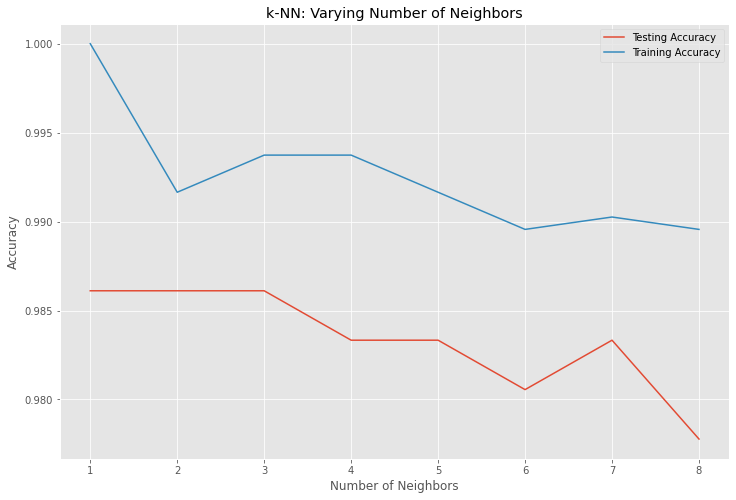

In [84]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
fig=plt.figure(figsize=(12,8))

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


## 4. Preprocessing and pipelines

introduces pipelines, and how scikit-learn allows for transformers and estimators to be chained together and used as a single unit. Preprocessing techniques will be introduced as a way to enhance model performance, and pipelines will tie together concepts from previous chapters.
